## Titanic Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('test.csv')
titanic = pd.read_csv('train.csv')

In [3]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


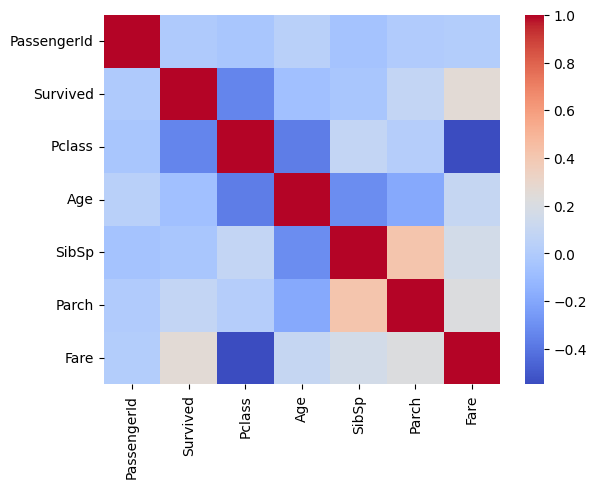

In [4]:
titanic_num = titanic.select_dtypes(include=['float64', 'int64'])
corr_matrics = titanic_num.corr()
sns.heatmap(data=corr_matrics, cmap='coolwarm')
plt.show()

In [5]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

# Initialize StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2 )

# Split the data
for train_indices, test_indices in split.split(titanic, titanic[["Survived", "Sex", "Pclass"]]):
    strait_train_split = titanic.loc[train_indices]
    strait_test_split = titanic.loc[test_indices]

In [7]:
strait_test_split["Survived"].value_counts()


Survived
0    111
1     68
Name: count, dtype: int64

In [8]:
strait_test_split["Sex"].value_counts()

Sex
male      115
female     64
Name: count, dtype: int64

In [9]:
strait_train_split["Survived"].value_counts()

Survived
0    438
1    274
Name: count, dtype: int64

In [10]:
438/111

3.945945945945946

In [11]:
274/68

4.029411764705882

In [12]:
strait_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 215 to 273
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          578 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        166 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Estimator and Imputer

In [13]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        imputer = SimpleImputer(strategy="mean")
        X['Age'] = imputer.fit_transform(X[['Age']])
        return X

In [14]:
from sklearn.preprocessing import OneHotEncoder

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         encoder = OneHotEncoder()
#         matrix = encoder.fit_transform(X[['Sex']]).toarray()

#         column_names = ['Male', 'Female']
#         for i in range (len(matrix.T)):
#             X[column_names[i]]=matrix.T[i]

#         matrix = encoder.fit_transform(X[['Embarked']])
#         column_names = ['C', 'Q', 'N', 'S']
#         for i in range(len(matrix.T)):
#             X[column_names[i]]=matrix.T[i]

#         return X

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        
        # Encoding 'Sex' if not already encoded
        if 'Sex_female' not in X.columns:
            matrix = encoder.fit_transform(X[['Sex']])
            column_names = encoder.get_feature_names_out(['Sex'])
            for i in range(len(matrix.T)):
                X[column_names[i]] = matrix.T[i]
        
        # Encoding 'Embarked' if not already encoded
        if 'Embarked_C' not in X.columns:
            matrix = encoder.fit_transform(X[['Embarked']])
            column_names = encoder.get_feature_names_out(['Embarked'])
            for i in range(len(matrix.T)):
                X[column_names[i]] = matrix.T[i]
        
        return X


In [15]:
# class FeatureDropper(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):
#         return self

#     def transform(self, X):
#         return X.drop(["Embarked", "Name", "N", "Sex", "Cabin", "Ticket"], axis=1, errors="ignore")
class FeatureDropper(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Drop columns that are no longer needed
        return X.drop(["Name", "Cabin", "Ticket", "N","Sex","Embarked", "Embarked_nan"], axis=1, errors="ignore")


In [16]:
print(strait_train_split.columns)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [17]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([("AgeImputer", AgeImputer()),
                    ("FeatureEncoder", FeatureEncoder()),
                    ("FeatureDropper", FeatureDropper())])

In [18]:
strait_train_split = pipeline.fit_transform(strait_train_split)
strait_train_split

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
215,216,1,1,31.0,1,0,113.2750,1.0,0.0,1.0,0.0,0.0
545,546,0,1,64.0,0,0,26.0000,0.0,1.0,0.0,0.0,1.0
606,607,0,3,30.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
890,891,0,3,32.0,0,0,7.7500,0.0,1.0,0.0,1.0,0.0
292,293,0,2,36.0,0,0,12.8750,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
666,667,0,2,25.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
68,69,1,3,17.0,4,2,7.9250,1.0,0.0,0.0,0.0,1.0
623,624,0,3,21.0,0,0,7.8542,0.0,1.0,0.0,0.0,1.0
122,123,0,2,32.5,1,0,30.0708,0.0,1.0,1.0,0.0,0.0


In [19]:
strait_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 215 to 273
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Sex_female   712 non-null    float64
 8   Sex_male     712 non-null    float64
 9   Embarked_C   712 non-null    float64
 10  Embarked_Q   712 non-null    float64
 11  Embarked_S   712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [20]:
from sklearn.preprocessing import StandardScaler

X = strait_train_split.drop(['Survived'], axis=1)
Y = strait_train_split['Survived']

scaler =StandardScaler()
X_data = scaler.fit_transform(X)
Y_data = Y.to_numpy()

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth":[None, 5, 10], "min_samples_split":[2, 3, 4]}
]

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data, Y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [22]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=200)

In [23]:
strait_test_split = pipeline.fit_transform(strait_test_split)

In [24]:
strait_test_split

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
705,706,0,2,39.000000,0,0,26.0000,0.0,1.0,0.0,0.0,1.0
598,599,0,3,29.356029,0,0,7.2250,0.0,1.0,1.0,0.0,0.0
156,157,1,3,16.000000,0,0,7.7333,1.0,0.0,0.0,1.0,0.0
455,456,1,3,29.000000,0,0,7.8958,0.0,1.0,1.0,0.0,0.0
241,242,1,3,29.356029,1,0,15.5000,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
709,710,1,3,29.356029,1,1,15.2458,0.0,1.0,1.0,0.0,0.0
174,175,0,1,56.000000,0,0,30.6958,0.0,1.0,1.0,0.0,0.0
761,762,0,3,41.000000,0,0,7.1250,0.0,1.0,0.0,0.0,1.0
745,746,0,1,70.000000,1,1,71.0000,0.0,1.0,0.0,0.0,1.0


In [25]:
strait_train_split.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 215 to 273
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   Sex_female   712 non-null    float64
 8   Sex_male     712 non-null    float64
 9   Embarked_C   712 non-null    float64
 10  Embarked_Q   712 non-null    float64
 11  Embarked_S   712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [26]:
X_test = strait_train_split.drop(['Survived'], axis=1)
Y_test = strait_train_split['Survived']

scaler =StandardScaler()
X_data_test = scaler.fit_transform(X_test)
Y_data_test = Y_test.to_numpy()

In [27]:
final_clf.score(X_data_test, Y_data_test)

0.851123595505618

In [28]:
final_data = pipeline.fit_transform(titanic)

In [29]:
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,1,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,0,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,889,0,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,890,1,1,26.000000,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


In [30]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_female   891 non-null    float64
 8   Sex_male     891 non-null    float64
 9   Embarked_C   891 non-null    float64
 10  Embarked_Q   891 non-null    float64
 11  Embarked_S   891 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 83.7 KB


In [31]:
X_final = final_data.drop(['Survived'], axis=1)
Y_final = final_data['Survived']

scaler = StandardScaler()
X_data_final = scaler.fit_transform(X_final)
Y_data_final = Y_final.to_numpy()

In [32]:
prod_clf = RandomForestClassifier()

param_grid = [
    {"n_estimators": [10, 100, 200, 500], "max_depth":[None, 5, 10], "min_samples_split":[2, 3, 4]}
]

grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring="accuracy", return_train_score=True)
grid_search.fit(X_data_final, Y_data_final)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [33]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=5, min_samples_split=3, n_estimators=500)

## NOW TESTING

In [34]:
titanic_test_data = pd.read_csv("test.csv")

In [35]:
final_test_data = pipeline.fit_transform(titanic_test_data)

In [36]:
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,893,3,47.00000,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,895,3,27.00000,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [37]:
final_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Age          418 non-null    float64
 3   SibSp        418 non-null    int64  
 4   Parch        418 non-null    int64  
 5   Fare         417 non-null    float64
 6   Sex_female   418 non-null    float64
 7   Sex_male     418 non-null    float64
 8   Embarked_C   418 non-null    float64
 9   Embarked_Q   418 non-null    float64
 10  Embarked_S   418 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 36.1 KB


In [38]:
X_final_test = final_test_data
X_final_test = X_final_test.ffill()

scaler = StandardScaler()
X_data_final_test = scaler.fit_transform(X_final_test)

In [39]:
predictions = prod_final_clf.predict(X_data_final_test)

In [40]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [43]:
final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions
final_df.to_csv('Predictions4.csv', index=False)

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## Another test

In [44]:
titanic_test_dataa = pd.read_csv("test_2.csv")

In [45]:
titanic_test_data2 = titanic_test_dataa.drop(['Survived'], axis=1)

In [46]:
titanic_test_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [47]:
final_test_data2 = pipeline.fit_transform(titanic_test_data2)

In [48]:
final_test_data2

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,2,1,38.000000,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,3,26.000000,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,4,1,35.000000,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,5,3,35.000000,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,888,1,19.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,889,3,29.699118,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,890,1,26.000000,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


In [49]:
final_test_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Sex_female   891 non-null    float64
 7   Sex_male     891 non-null    float64
 8   Embarked_C   891 non-null    float64
 9   Embarked_Q   891 non-null    float64
 10  Embarked_S   891 non-null    float64
dtypes: float64(7), int64(4)
memory usage: 76.7 KB


In [50]:
X_final_test2 = final_test_data2
X_final_test2 = X_final_test2.ffill()

scaler = StandardScaler()
X_data_final_test2 = scaler.fit_transform(X_final_test2)

In [51]:
predictions2 = prod_final_clf.predict(X_data_final_test2)

In [52]:
predictions2

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,

In [53]:
titanic_test_dataa.head(-10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


## Thank you for reviewing my Project :)

## SAGAR